<a href="https://colab.research.google.com/github/zain4cs/Banking-Customer-Churn-Prediction/blob/main/Ecom_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Pakistan Largest Ecommerce Dataset.csv")
df.head()

/tmp/ipython-input-4226985986.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Datasets/Pakistan Largest Ecommerce Dataset.csv")


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 23,1048575
Unnamed: 22,1048575
Unnamed: 25,1048575
Unnamed: 24,1048575
Unnamed: 21,1048575
sales_commission_code,601229
category_name_1,464215
sku,464071
status,464066
Customer Since,464062


In [8]:
df['BI Status'].value_counts()

,count
BI Status,
Net,234178
Gross,201454
Valid,148891
#REF!,1


In [9]:
data = df.select_dtypes(include=['int','float'])
data.head()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,1950.0,1.0,1950.0,0.0,2016.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,240.0,1.0,240.0,0.0,2016.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,2450.0,1.0,2450.0,0.0,2016.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,360.0,1.0,60.0,300.0,2016.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,555.0,2.0,1110.0,0.0,2016.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df_copy = df.copy()
df_filter = {}
for col in data:
  q1 = df_copy[col].quantile(0.25)
  q3 = df_copy[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outlier = df_copy[(df_copy[col]<=lower_bound)|(df_copy[col]>=upper_bound)]
  df_filter[col] = len(outlier)

  df_series = pd.Series(df_filter).sort_values(ascending=False)


In [11]:
print(df_series)

qty_ordered        584524
discount_amount    108989
price              105849
grand_total         77090
item_id                 0
Year                    0
Month                   0
Customer ID             0
Unnamed: 21             0
Unnamed: 22             0
Unnamed: 23             0
Unnamed: 24             0
Unnamed: 25             0
dtype: int64


In [12]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [13]:
df.columns = df.columns.str.strip()

In [14]:
unnamed = [c for c in df.columns if c.startswith("Unnamed")]
print("Unnamed columns: ",unnamed)

Unnamed columns:  ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']


In [15]:
df = df.drop(columns=[c for c in unnamed if df[c].isnull().all()], errors='ignore')

In [16]:
missing_pct = df.isnull().mean().sort_values(ascending=False)
print(missing_pct.head(25))

sales_commission_code    0.573377
category_name_1          0.442710
sku                      0.442573
status                   0.442568
Customer Since           0.442564
Customer ID              0.442564
price                    0.442554
item_id                  0.442554
created_at               0.442554
increment_id             0.442554
discount_amount          0.442554
grand_total              0.442554
qty_ordered              0.442554
Working Date             0.442554
payment_method           0.442554
BI Status                0.442554
MV                       0.442554
Month                    0.442554
Year                     0.442554
M-Y                      0.442554
FY                       0.442554
dtype: float64


In [17]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [18]:
essential = ['created_at','grand_total','qty_ordered','price','Customer ID','increment_id']
essential = [c for c in essential if c in df.columns]


In [19]:
mask = df[essential].notnull().all(axis=1)
print("Rows with all essentials non-null: ", mask.sum()," out of ",len(df))

Rows with all essentials non-null:  584513  out of  1048575


In [20]:
df_good = df[mask].copy()

___________________________

**dtypes, parse dates, downcast numeric, remove non-positive prices**

In [21]:
df_good['created_at'] = pd.to_datetime(df['created_at'],errors='coerce')

In [22]:
df_good['Month']

,Month
0,7.0
1,7.0
2,7.0
3,7.0
4,7.0
...,...
584519,8.0
584520,8.0
584521,8.0
584522,8.0


In [23]:
for c in ['Year','Month']:
  if c in df_good.columns:
    df_good[c] = pd.to_numeric(df[c],errors='coerce').astype('Int64')

In [24]:
num_df = df_good.select_dtypes(include=['int','float'])
num_df.columns

Index(['item_id', 'price', 'qty_ordered', 'grand_total', 'discount_amount',
       'Year', 'Month', 'Customer ID'],
      dtype='object')

In [25]:
for c in ['price', 'qty_ordered', 'grand_total', 'discount_amount']:
  if c in df_good.columns:
    df_good[c] = pd.to_numeric(df[c],errors='coerce').astype('float32')

In [26]:
df_good.shape

(584513, 21)

In [27]:
df_good = df_good[(df_good['price']>0)&(df_good['grand_total']>0)]
print("After dropping zero/neg price rows ",df_good.shape)

After dropping zero/neg price rows  (572739, 21)


In [28]:
df_good.isnull().sum()

,0
item_id,0
status,14
created_at,0
sku,3
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,163
sales_commission_code,133385


In [29]:
df_good['sales_commission_code']

,sales_commission_code
0,\N
1,\N
2,\N
3,R-FSD-52352
4,\N
...,...
584519,NaN
584520,NaN
584521,NaN
584522,NaN


______________________________

**Fill categorical nulls sensibly**

In [30]:
category_cols = df.select_dtypes(include=['object']).columns
category_cols

Index(['status', 'created_at', 'sku', 'increment_id', 'category_name_1',
       'sales_commission_code', 'payment_method', 'Working Date', 'BI Status',
       'MV', 'Customer Since', 'M-Y', 'FY'],
      dtype='object')

In [31]:
cat_cols = ['category_name_1','payment_method','status','sales_commission_code','MV','BI Status','sku']
for c in cat_cols:
  if c in df_good.columns:
    df_good[c] = df_good[c].fillna('Unkown').astype('category')

In [32]:
if 'sales_commission_code' in df_good.columns:
  df_good['has_commission_code'] = (df['sales_commission_code'] != 'Unkown').astype('int8')

In [33]:
result = {}
for c in cat_cols:
  if c in df_good.columns:
    result[c] = df_good[c].nunique()

In [34]:
result

{'category_name_1': 17,
 'payment_method': 17,
 'status': 17,
 'sales_commission_code': 7054,
 'MV': 9666,
 'BI Status': 4,
 'sku': 83081}

____________________________

**impute price using sku median, only if sku present**

In [35]:
if 'sku' in df_good.columns:
  sku_med = df_good.groupby('sku')['price'].median()
  missing_price_mask = df_good['price'].isnull() & df_good['sku'].notnull()
  print("Missing price rows with sku:", missing_price_mask.sum())

Missing price rows with sku: 0


/tmp/ipython-input-3925137994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sku_med = df_good.groupby('sku')['price'].median()


In [36]:
df_good = df_good.dropna(subset=['price','grand_total'])
print("After impute and drop: ", df_good.shape)

After impute and drop:  (572739, 22)


______________________________

**Visualize distributions, check skew and extreme values**

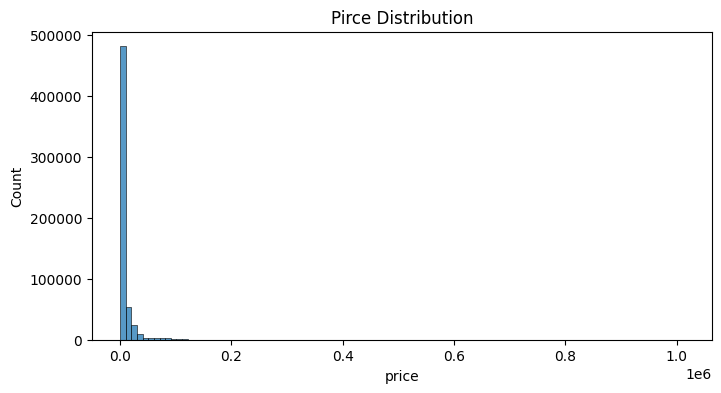

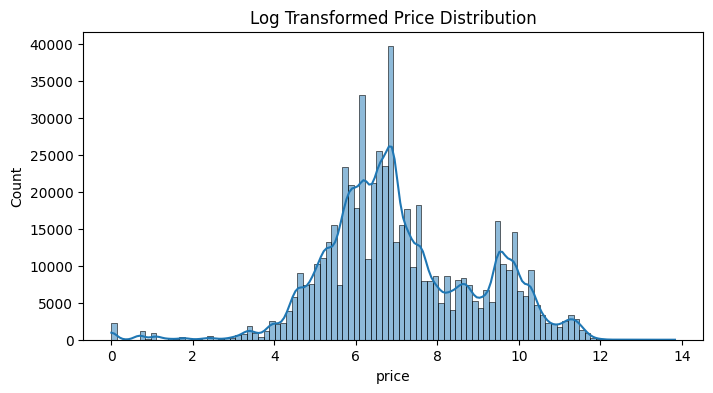

In [37]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'],bins=100)
plt.title("Pirce Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df['price']), bins=100,kde=True)
plt.title("Log Transformed Price Distribution")
plt.show()

In [38]:
for c in ['qty_ordered','price','grand_total']:
    if c in df_good.columns:
        print(c, "99th percentile:", df_good[c].quantile(0.99), "max:", df_good[c].max())

qty_ordered 99th percentile: 5.0 max: 1000.0
price 99th percentile: 83770.0 max: 1012625.875
grand_total 99th percentile: 90700.0 max: 17888000.0


In [39]:
def cap_percentile(col, low=0.01, high=0.99):
  lo = col.quantile(low)
  hi = col.quantile(high)
  return col.clip(lower=lo, upper=hi)

for c in ['price','grand_total','qty_ordered','discount_amount']:
  df_good[c+'cap'] = cap_percentile(df_good[c])
  df_good['Log'+c] = np.log1p(df_good[c])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
print("Price cap Min ", df_good['pricecap'].min()," Max ",df_good['pricecap'].max())

Price cap Min  27.0  Max  83770.0


In [41]:
df_good.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'has_commission_code', 'pricecap',
       'Logprice', 'grand_totalcap', 'Loggrand_total', 'qty_orderedcap',
       'Logqty_ordered', 'discount_amountcap', 'Logdiscount_amount'],
      dtype='object')

In [42]:
df_good['order_date'] = pd.to_datetime(df_good['created_at'], errors='coerce')
df_good['order_month'] = df_good['order_date'].dt.to_period('M').astype('str')
df_good['AOV'] = df_good['grand_total'] / df_good['qty_ordered']

In [43]:
cust = df_good.groupby('Customer ID').agg(
    last_order = ('order_date','max'),
    orders = ('increment_id','nunique'),
    total_spend = ('grand_total','sum'),
    avg_order_value = ('AOV','mean')
).reset_index()

In [44]:
current_date = df_good['order_date'].max()
cust['recency_days'] = (current_date - cust['last_order']).dt.days
cust = cust.sort_values('total_spend',ascending=False)
cust.head()

,Customer ID,last_order,orders,total_spend,avg_order_value,recency_days
4983,5032.0,2017-11-24,37,72150384.0,8493.732422,277
50180,50387.0,2017-06-09,1,35776000.0,17888.000000,445
110487,111057.0,2018-07-22,75,31338184.0,196851.921875,37
108492,109038.0,2018-07-20,100,28341358.0,138590.343750,39
109657,110215.0,2018-08-18,94,21969066.0,128594.171875,10


______________________________________

**sampling for prototyping, final saving**

In [45]:
if 'increment_id' in df_good.columns:
  df_good['increment_id'] = df_good['increment_id'].astype('str')

In [46]:
if len(df_good)>100000:
  sample = df_good.sample(n=100000, random_state=42)
else:
  sample = df_good.copy()

In [47]:
df_good.to_parquet("ecom_cleaned.parquet", index=False)
sample.to_parquet("ecom_sample.parquet",index=False)
print("Saved cleaned dataset")

Saved cleaned dataset


In [48]:
summary = {
    'org_rows': len(df),
    'usable': len(df_good),
    'unique_cust': df_good['Customer ID'].nunique() if 'Customer ID' in df_good.columns else None,
    'columns_kept': df_good.columns.tolist()

}



In [49]:
summary

{'org_rows': 1048575,
 'usable': 572739,
 'unique_cust': 114739,
 'columns_kept': ['item_id',
  'status',
  'created_at',
  'sku',
  'price',
  'qty_ordered',
  'grand_total',
  'increment_id',
  'category_name_1',
  'sales_commission_code',
  'discount_amount',
  'payment_method',
  'Working Date',
  'BI Status',
  'MV',
  'Year',
  'Month',
  'Customer Since',
  'M-Y',
  'FY',
  'Customer ID',
  'has_commission_code',
  'pricecap',
  'Logprice',
  'grand_totalcap',
  'Loggrand_total',
  'qty_orderedcap',
  'Logqty_ordered',
  'discount_amountcap',
  'Logdiscount_amount',
  'order_date',
  'order_month',
  'AOV']}

**Exploratory Data Analysis (EDA)**

<Axes: title={'center': 'Monthly Sales'}, xlabel='order_month'>

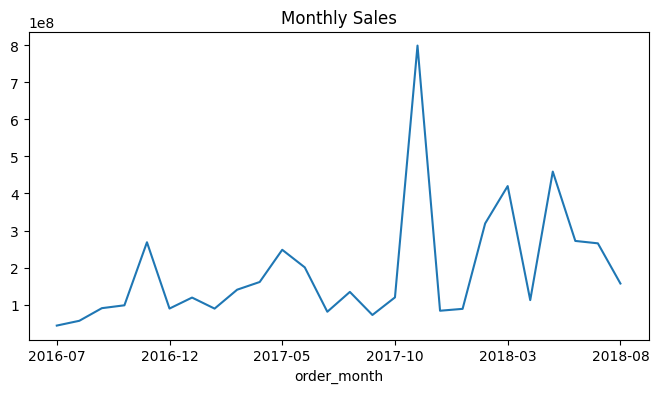

In [50]:
df_good.groupby('order_month')['grand_total'].sum().plot(figsize=(8,4), title="Monthly Sales")


/tmp/ipython-input-1613947359.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_good.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title="Top Categories by Sales")


<Axes: title={'center': 'Top Categories by Sales'}, xlabel='category_name_1'>

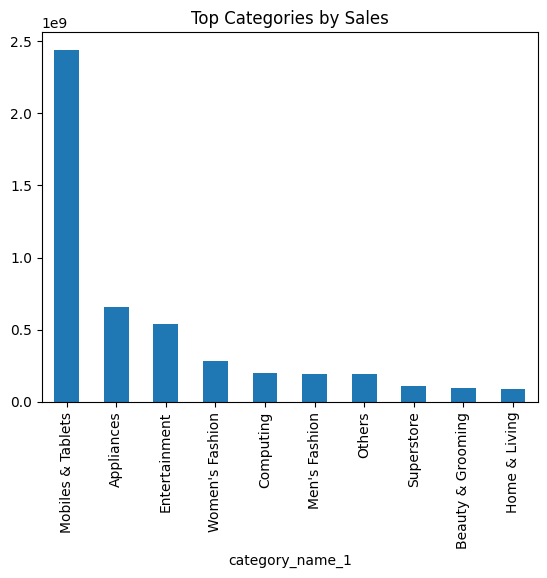

In [51]:
df_good.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title="Top Categories by Sales")


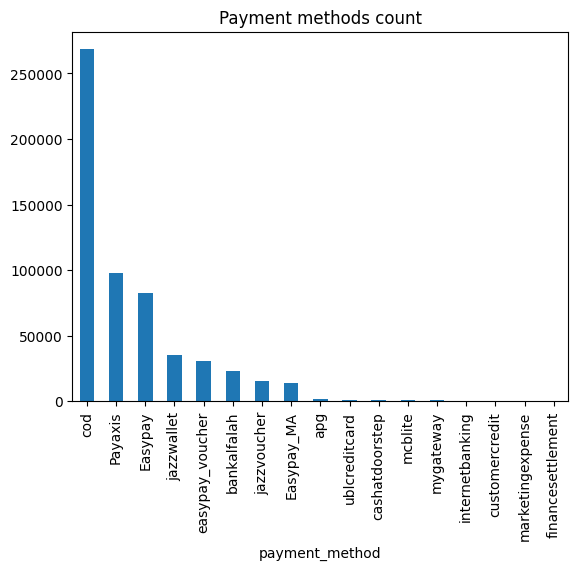

In [52]:
df_good['payment_method'].value_counts().plot(kind='bar', title='Payment methods count')
plt.show()


**Feature Engineering**

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_good['category_name_1'] = le.fit_transform(df_good[['category_name_1']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_good[['price_scaled','grand_total_scaled']] = scaler.fit_transform(df_good[['price','grand_total']])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X = df_good[['price', 'qty_ordered', 'discount_amount']]
y = df_good['grand_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("R²:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))


R²: 0.9726788025273787
MAE: 2186.1075464550895


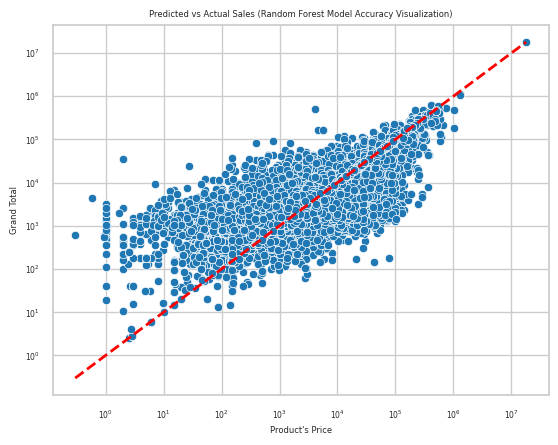

In [84]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=0.5)

sns.scatterplot(x=y_test, y=pred)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Actual Grand Total (y_test)")
plt.ylabel("Predicted Grand Total (y_pred)")
plt.title("Predicted vs Actual Sales (Random Forest Model Accuracy Visualization)")
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'r--',lw=2)
plt.savefig('ecom_data_graph.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=0.5)

sns.scatterplot(x=y_test, y=pred)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Product's Price")
plt.ylabel("Grand Total")
plt.title("Predicted vs Actual Sales (Random Forest Model Accuracy Visualization)")
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'r--',lw=2)
plt.savefig('ecom_data_graph.png', dpi=300, bbox_inches='tight')
plt.show()
